In [2]:
import pandas as pd

1 - Definindo o caminho dos arquivos

2 - Carregando o arquivo movies.csv

3 - pd.read_csv(caminho_arquivo) lê o arquivo CSV e carrega os dados em um DataFrame chamado filmes.

4 - filmes.columns = ["filmeId", "titulo", "genero"] define os nomes das colunas do DataFrame. 

5 - filmes = filmes.set_index("filmeId") define a coluna filmeId como índice do DataFrame.

6 - filmes.head() mostra as primeiras 5 linhas do DataFrame filmes.

In [3]:
caminho = "C:\\Users\\natal\\OneDrive\\Área de Trabalho\\Estudo Python\\SistemaRecomendação\\ml-latest-small"
caminho_arquivo = caminho + "\\movies.csv"
filmes = pd.read_csv(caminho_arquivo)
filmes.columns = ["filmeId", "titulo", "genero"]
filmes = filmes.set_index("filmeId")
filmes.head()

,titulo,genero
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


1 - Definindo o caminho dos arquivos

2 - Carregando o arquivo ratings.csv

3 - notas = pd.read_csv(caminho_arquivo) lê o arquivo e armazena o resultado(leitura) no dataframe chamado notas

4 - Define o nome das colunas do dataframe notas 

5 -  Exibe as 5 primeiras linhas do dataframe

In [4]:
caminho_arquivo = caminho + "\\ratings.csv"
notas = pd.read_csv(caminho_arquivo)
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
notas.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [6]:
notas

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [7]:
filmes.loc[318]

titulo    Shawshank Redemption, The (1994)
genero                         Crime|Drama
Name: 318, dtype: object

Primeira tentativa de recomendação: heuristica de total de votos

1 - notas["filmeId"].value_counts() conta o número de ocorrências (votos) de cada filmeId no DataFrame notas. 
O resultado é um Series com o filmeId como índice e o número de votos como valores.

Exemplo:
```
filmeId
1
3
6
47
50
1
3
6
47
50
1
1
```
filmeId = 1, apareceu 4 vezes em notas; filmeId = 3, apareceu 2 vezes em nota e assim por diante:
```
1     4
3     2
6     2
47    2
50    2
Name: filmeId, dtype: int64
```
2 - total_de_votos.head() mostra as 5 primeiras contagens.


In [8]:
total_de_votos = notas["filmeId"].value_counts()
total_de_votos.head()

filmeId
356     329
318     317
296     307
593     279
2571    278
Name: count, dtype: int64

1 - filmes['total_de_votos'] = total_de_votos adiciona uma nova coluna total_de_votos ao DataFrame filmes, onde os valores são preenchidos a partir do Series total_de_votos. O índice do Series total_de_votos corresponde ao índice filmeId do DataFrame filmes.

2 - filmes.head() mostra as primeiras 5 linhas do DataFrame filmes, agora incluindo a coluna total_de_votos.

In [9]:
filmes['total_de_votos'] = total_de_votos
filmes.head()

,titulo,genero,total_de_votos
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,110.0
3,Grumpier Old Men (1995),Comedy|Romance,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
5,Father of the Bride Part II (1995),Comedy,49.0


1 - Ordenando dataframe filmes de acordo com a coluna total_de_votos em formato decrecente.

In [10]:
filmes.sort_values("total_de_votos", ascending= False)

,titulo,genero,total_de_votos
filmeId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0
...,...,...,...
30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
32160,Twentieth Century (1934),Comedy,NaN
32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN


O objetivo deste código é calcular a média das notas (avaliações) de cada filme e armazenar esses valores em uma Series.

1 - notas.groupby("filmeId") agrupa o DataFrame notas pelo valor da coluna filmeId. Isso significa que todas as linhas com o mesmo filmeId serão agrupadas juntas. O resultado é um DataFrameGroupBy objeto, que permite operações de agregação em cada grupo.

2 - .mean() calcula a média de cada coluna numérica para cada grupo (neste caso, para cada filmeId). O resultado é um novo DataFrame onde o índice são os valores únicos de filmeId e as colunas são as médias das colunas numéricas originais (neste caso, usuarioId, nota e momento).

3 -  ["nota"] seleciona apenas a coluna nota do DataFrame resultante da operação anterior. O resultado é uma Series onde o índice são os valores únicos de filmeId e os valores são as médias das notas para cada filmeId.

In [11]:
nota_medias = notas.groupby("filmeId").mean()["nota"]
nota_medias.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

1 - Adiciona a coluna nota_media no dataframe filmes, essa coluna recebe o valor de notas_medias

2 - Ordena dataframe filmes pela coluna total_de_votos em ordem decrescente e mostra as 10 primeiras linhas 

In [12]:
filmes["nota_media"] = nota_medias
filmes.sort_values("total_de_votos", ascending = False).head(10)

,titulo,genero,total_de_votos,nota_media
filmeId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0,4.231076
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0,3.750000
110,Braveheart (1995),Action|Drama|War,237.0,4.031646
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0,3.970982


Uma segunda heuristica: nota media e filtrando votos

In [13]:
filmes.sort_values("nota_media", ascending = False).head(10)

,titulo,genero,total_de_votos,nota_media
filmeId,,,,
88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,1.0,5.0
100556,"Act of Killing, The (2012)",Documentary,1.0,5.0
143031,Jump In! (2007),Comedy|Drama|Romance,1.0,5.0
143511,Human (2015),Documentary,1.0,5.0
143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,1.0,5.0
6201,Lady Jane (1986),Drama|Romance,1.0,5.0
102217,Bill Hicks: Revelations (1993),Comedy,1.0,5.0
102084,Justice League: Doom (2012),Action|Animation|Fantasy,1.0,5.0
6192,Open Hearts (Elsker dig for evigt) (2002),Romance,1.0,5.0


In [14]:
filmes.query("total_de_votos >= 10").sort_values("nota_media", ascending = False).head(10)

,titulo,genero,total_de_votos,nota_media
filmeId,,,,
1041,Secrets & Lies (1996),Drama,11.0,4.590909
3451,Guess Who's Coming to Dinner (1967),Drama,11.0,4.545455
1178,Paths of Glory (1957),Drama|War,12.0,4.541667
1104,"Streetcar Named Desire, A (1951)",Drama,20.0,4.475000
2360,"Celebration, The (Festen) (1998)",Drama,12.0,4.458333
1217,Ran (1985),Drama|War,15.0,4.433333
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
951,His Girl Friday (1940),Comedy|Romance,14.0,4.392857
1927,All Quiet on the Western Front (1930),Action|Drama|War,10.0,4.350000


In [15]:
filmes_com_mais_de_cinquenta_votos = filmes.query("total_de_votos > 50")
filmes_com_mais_de_cinquenta_votos.sort_values("nota_media", ascending = False).head(10)

,titulo,genero,total_de_votos,nota_media
filmeId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
904,Rear Window (1954),Mystery|Thriller,84.0,4.261905
1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
48516,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.252336
1213,Goodfellas (1990),Crime|Drama,126.0,4.250000


In [16]:
eu_assisti = [1,21,19, 10, 11, 7, 2]
filmes.loc[eu_assisti]

,titulo,genero,total_de_votos,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
21,Get Shorty (1995),Comedy|Crime|Thriller,89.0,3.494382
19,Ace Ventura: When Nature Calls (1995),Comedy,88.0,2.727273
10,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212
11,"American President, The (1995)",Comedy|Drama|Romance,70.0,3.671429
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818


1 - Pega o resultado de filmes_com_mais_de_cinquenta_votos e filtra pelos generos 'Adventure|Children|Fantasy'

Assim traz  o resultado dos filmes com mais de 50 votos e dentre eles traz  quais são do genero  aventura,infantil e fantasia 

2 - Pega o resultado anterior e ordena pela media das notas em ordem decrescente , os 10 primeiros 

e retira os que aparessem em eu_assisti

In [17]:
aventura_infantil_e_fantasia = filmes_com_mais_de_cinquenta_votos.query("genero == 'Adventure|Children|Fantasy'")
aventura_infantil_e_fantasia.drop(eu_assisti, errors='ignore').sort_values("nota_media", ascending = False).head(10)

,titulo,genero,total_de_votos,nota_media
filmeId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548


collaborative filtering x content based filtering 

Procurar usuarios similares

- João deu nota 4 no filme toy store 
- Maria deu nota 4 no filme toy store 
- Paulo deu nota 3 no filme toy store 
- Joana deu nota 3.5 no filme toy store 

Distância 
- Maria(nota 5) Para João (nota 4)
    - 5 - 4 = 1   
- Joao(nota 4) para Joana (nota 3.5)
    - 4 - 3.5 = 0.5 

No caso de
- João 
    - deu nota 4 no filme toy store 
    - deu nota 4.5 no filme mulher maravilha
- Maria 
    - deu nota 5 no filme toy store 
    - deu nota 5 no filme mulher maravilha    

A distância já não é mais uma reta , agora virou 2D no plano cartesiano, ou seja, joão nota(x,y)

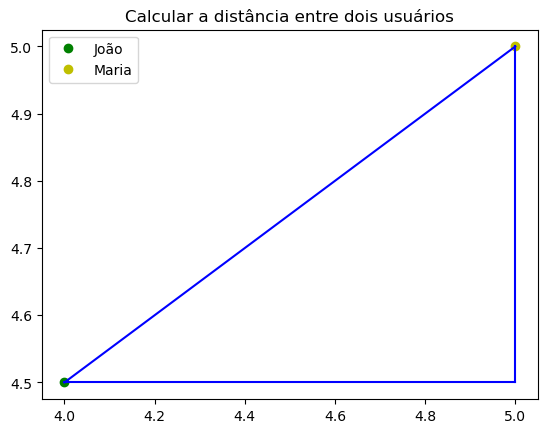

In [18]:
import matplotlib.pyplot as plt 
plt.plot(4, 4.5, "go")
plt.plot(5, 5, "yo")
plt.legend(["João", "Maria"])
plt.title("Calcular a distância entre dois usuários")

plt.plot([4, 5], [4.5, 4.5], color="b", linestyle="-")
plt.plot([4, 5], [4.5, 5], color="b", linestyle="-")
plt.plot([5, 5], [4.5, 5], color="b", linestyle="-")

In [19]:
import numpy as np

joao = np.array([4,4.5])
maria = np.array([5, 5])

joao - maria 

array([-1. , -0.5])


````
from math import sqrt
def pitagoras(a,b):
    (delta_x, delta_y) = a - b
    return sqrt(delta_x * delta_x + delta_y * delta_y)
pitagoras(joao, maria)
````
Esse formula acima é o mesmo que o codigo abaixo

In [20]:
def distancia_de_vetores(a,b):
    return np.linalg.norm(a - b)

In [21]:
distancia_de_vetores(joao, maria)

1.118033988749895

Text(0.5, 1.0, 'Calcular a distância entre  usuários')

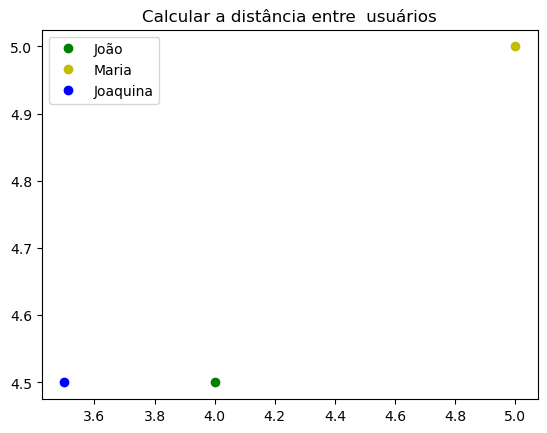

In [22]:
import matplotlib.pyplot as plt 
plt.plot(4, 4.5, "go")
plt.plot(5, 5, "yo")
plt.plot(3.5, 4.5, "bo")
plt.legend(["João", "Maria", "Joaquina"])
plt.title("Calcular a distância entre  usuários")

In [23]:
joaquina = np.array([3.5, 4.5])
print(distancia_de_vetores(joao, maria))
print(distancia_de_vetores(joao, joaquina))

1.118033988749895
0.5


Da para notar que Joaquina tem o gosto mais parecido com o do Joao

Então, baseado no que a Joaquina gostou, de forma colaborativa, eu filtro os filmes para recomendar para o João



Distância entre usuários do dataset

````def notas_do_usuario(usuario):
    """
    Retorna as notas (avaliações) de um usuário específico.

    Esta função filtra o DataFrame `notas` para obter as avaliações feitas por um usuário
    específico, identificado pelo seu `usuarioId`. O resultado é um DataFrame contendo
    os IDs dos filmes avaliados e as respectivas notas, com o ID do filme como índice.

    Parâmetros:
    ----------
    usuario : int
        O ID do usuário cujas avaliações serão retornadas.

    Retorno:
    -------
    pandas.DataFrame
        DataFrame contendo os IDs dos filmes (filmeId) e as notas (nota) atribuídas
        pelo usuário especificado. O DataFrame possui o ID do filme como índice.

    Exemplo:
    -------
    >>> notas_do_usuario(1)
         nota
    filmeId     
    1       4.0
    3       4.0
    6       4.0
    47      5.0
    50      5.0
    """
    
    # Filtra o DataFrame 'notas' para obter apenas as avaliações do usuário especificado
    notas_do_usuario = notas.query("usuarioId==%d" % usuario)
    
    # Seleciona as colunas 'filmeId' e 'nota' e define 'filmeId' como índice
    notas_do_usuario = notas_do_usuario[["filmeId", "nota"]].set_index(["filmeId"])
    
    return notas_do_usuario
````
Explicação Detalhada
- Objetivo:
    - A função notas_do_usuario é projetada para retornar todas as avaliações feitas por um usuário específico. É útil quando se deseja analisar as preferências de um usuário em particular.

- Parâmetros:

    - usuario (int): O ID do usuário cujas avaliações serão retornadas. Este valor deve corresponder ao usuarioId presente no DataFrame notas.
- Valor de Retorno:

    - A função retorna um pandas.DataFrame contendo duas colunas: filmeId e nota. O filmeId é definido como índice, e cada linha do DataFrame representa uma avaliação feita pelo usuário, mostrando o ID do filme e a nota atribuída.

In [24]:
def notas_do_usuario(usuario):
    notas_do_usuario = notas.query("usuarioId==%d" % usuario)
    notas_do_usuario = notas_do_usuario[["filmeId", "nota"]].set_index(["filmeId"])
    return notas_do_usuario

In [25]:
notas_do_usuario(1)

,nota
filmeId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0
...,...
3744,4.0
3793,5.0
3809,4.0


In [26]:
usuario1 =  notas_do_usuario(1)
usuario4 =  notas_do_usuario(4)
usuario1.join(usuario4, lsuffix = "_esquerda", rsuffix = "_direita")

,nota_esquerda,nota_direita
filmeId,,
1,4.0,NaN
3,4.0,NaN
6,4.0,NaN
47,5.0,2.0
50,5.0,NaN
...,...,...
3744,4.0,NaN
3793,5.0,NaN
3809,4.0,3.0


In [27]:
diferencas = usuario1.join(usuario4, lsuffix = "_esquerda", rsuffix = "_direita").dropna()

In [28]:
diferencas

,nota_esquerda,nota_direita
filmeId,,
47,5.0,2.0
235,4.0,2.0
260,5.0,5.0
296,3.0,1.0
441,4.0,1.0
457,5.0,5.0
553,5.0,2.0
593,4.0,5.0
608,5.0,5.0


In [29]:
distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])

11.135528725660043

In [30]:
def distancia_de_usuarios(usuarioId1, usuarioId2):
    notas1 = notas_do_usuario(usuarioId1)
    notas2 = notas_do_usuario(usuarioId2)
    diferencas = notas1.join(notas2, lsuffix = "_esquerda", rsuffix = "_direita").dropna()
    distancia = distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
    return [usuarioId1, usuarioId2, distancia]

In [31]:
distancia_de_usuarios(1,4)

[1, 4, 11.135528725660043]

In [32]:
quantidade_de_usuario = len(notas['usuarioId'].unique())
print("Temos %d usuarios" % quantidade_de_usuario)

Temos 610 usuarios


In [33]:
voce_id = 1
def distancia_de_todos(voce_id):
    
    distancias = []
    for usuario_Id in notas["usuarioId"].unique():
        informacoes = distancia_de_usuarios(voce_id, usuario_Id)
        distancias.append(informacoes)
    return distancias

In [34]:
distancia_de_todos(1)[:5]

[[1, 1, 0.0],
 [1, 2, 1.4142135623730951],
 [1, 3, 8.200609733428363],
 [1, 4, 11.135528725660043],
 [1, 5, 3.7416573867739413]]

In [35]:
import pandas as pd
voce_id = 1
def distancia_de_todos(voce_id):
    todos_os_usuarios = notas['usuarioId'].unique()
    distancias = [distancia_de_usuarios(voce_id, usuario_Id) for usuario_Id in todos_os_usuarios]
    distancias = pd.DataFrame(distancias, columns = ["você", "outra_pessoa", "distancia"])
    return distancias
distancia_de_todos(1)[:5]

,você,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,1.414214
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657


Usuários sem filmes  em comum são colocados bem distantes um do outro 

In [36]:
def distancia_de_usuarios(usuarioId1, usuarioId2, minimo = 5):
    notas1 = notas_do_usuario(usuarioId1)
    notas2 = notas_do_usuario(usuarioId2)
    diferencas = notas1.join(notas2, lsuffix = "_esquerda", rsuffix = "_direita").dropna()
    if(len(diferencas) < minimo):
        return [usuarioId1, usuarioId2, 1000000]
    distancia = distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
    return [usuarioId1, usuarioId2, distancia]

In [37]:
def mais_proximos_de(voce_id):
    distancias = distancia_de_todos(voce_id)
    distancias = distancias.sort_values("distancia")
    distancias = distancias.set_index("outra_pessoa").drop(voce_id)
    return distancias

In [38]:
mais_proximos_de(1)

,você,distancia
outra_pessoa,,
77,1,0.000000
511,1,0.500000
366,1,0.707107
523,1,1.000000
49,1,1.000000
...,...,...
190,1,1000000.000000
60,1,1000000.000000
576,1,1000000.000000


Parametros para teste

In [39]:
def distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = None):
    todos_os_usuarios = notas['usuarioId'].unique()
    if numero_de_usuarios_a_analisar:
        todos_os_usuarios = todos_os_usuarios[:numero_de_usuarios_a_analisar]
    distancias = [distancia_de_usuarios(voce_id, usuario_Id) for usuario_Id in todos_os_usuarios]
    distancias = pd.DataFrame(distancias, columns = ["você", "outra_pessoa", "distancia"])
    return distancias

In [40]:
def mais_proximos_de(voce_id, numero_de_usuarios_a_analisar = None):
    distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
    distancias = distancias.sort_values("distancia")
    distancias = distancias.set_index("outra_pessoa").drop(voce_id)
    return distancias

In [41]:
mais_proximos_de(1, numero_de_usuarios_a_analisar = 50)

,você,distancia
outra_pessoa,,
49,1,1.000000
9,1,1.000000
13,1,1.414214
25,1,1.414214
30,1,1.802776
35,1,2.236068
26,1,2.236068
46,1,3.316625
8,1,3.741657


In [42]:
def distancia_de_todos(voce_id, numero_de_usuarios_a_analisar  = None):
    todos_os_usuarios = notas['usuarioId'].unique()
    if numero_de_usuarios_a_analisar:
        todos_os_usuarios = todos_os_usuarios[:numero_de_usuarios_a_analisar ]
    distancias = [distancia_de_usuarios(voce_id, usuario_Id) for usuario_Id in todos_os_usuarios]
    distancias = pd.DataFrame(distancias, columns = ["você", "outra_pessoa", "distancia"])
    return distancias

In [43]:
def distancia_de_usuarios(usuarioId1, usuarioId2, minimo = 5):
    notas1 = notas_do_usuario(usuarioId1)
    notas2 = notas_do_usuario(usuarioId2)
    diferencas = notas1.join(notas2, lsuffix = "_esquerda", rsuffix = "_direita").dropna()
    if(len(diferencas) < minimo):
        return None
    distancia = distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
    return [usuarioId1, usuarioId2, distancia]

In [44]:
def distancia_de_todos(voce_id, numero_de_usuarios_a_analisar  = None):
    todos_os_usuarios = notas['usuarioId'].unique()
    if numero_de_usuarios_a_analisar:
        todos_os_usuarios = todos_os_usuarios[:numero_de_usuarios_a_analisar ]
    distancias = [distancia_de_usuarios(voce_id, usuario_Id) for usuario_Id in todos_os_usuarios]
    distancias = list(filter(None, distancias))
    distancias = pd.DataFrame(distancias, columns = ["você", "outra_pessoa", "distancia"])
    return distancias

In [45]:
mais_proximos_de(1, numero_de_usuarios_a_analisar = 50)

,você,distancia
outra_pessoa,,
49,1,1.000000
9,1,1.000000
25,1,1.414214
13,1,1.414214
30,1,1.802776
35,1,2.236068
26,1,2.236068
46,1,3.316625
8,1,3.741657


In [49]:
def sugere_voce(voce, numero_de_usuarios_a_analisar = None):
    notas_de_voce = notas_do_usuario(voce)
    filmes_que_voce_ja_viu = notas_de_voce.index
    similares = mais_proximos_de(voce, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar )
    similar = similares.iloc[0].name
    notas_do_similar = notas_do_usuario(similar)
    notas_do_similar = notas_do_similar.drop(filmes_que_voce_ja_viu, errors="ignore")
    recomendacoes = notas_do_similar.sort_values("nota", ascending = False)
    return recomendacoes.join(filmes)

In [52]:
sugere_voce(1, numero_de_usuarios_a_analisar = 50)[:5]

,nota,titulo,genero,total_de_votos,nota_media
filmeId,,,,,
1200,4.5,Aliens (1986),Action|Adventure|Horror|Sci-Fi,126.0,3.964286
4022,4.5,Cast Away (2000),Drama,100.0,3.700000
47099,4.5,"Pursuit of Happyness, The (2006)",Drama,46.0,3.793478
79132,4.5,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143.0,4.066434
109487,4.5,Interstellar (2014),Sci-Fi|IMAX,73.0,3.993151


In [53]:
sugere_voce(1).head()

,nota,titulo,genero,total_de_votos,nota_media
filmeId,,,,,
8636,5.0,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX,79.0,3.803797
58559,5.0,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,149.0,4.238255
33794,5.0,Batman Begins (2005),Action|Crime|IMAX,116.0,3.862069
4993,5.0,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,198.0,4.106061
5349,5.0,Spider-Man (2002),Action|Adventure|Sci-Fi|Thriller,122.0,3.540984


Sugerindo baseado em varios usuarios

In [54]:
def mais_proximos_de(voce_id, n_mais_proximos=10,  numero_de_usuarios_a_analisar = None):
    distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
    distancias = distancias.sort_values("distancia")
    distancias = distancias.set_index("outra_pessoa").drop(voce_id)
    return distancias.head(n_mais_proximos)

In [56]:
mais_proximos_de(1, n_mais_proximos=2,numero_de_usuarios_a_analisar = 300)

,você,distancia
outra_pessoa,,
77,1,0.0
258,1,1.0


In [57]:
def sugere_para(voce, n_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
    notas_de_voce = notas_do_usuario(voce)
    filmes_que_voce_ja_viu = notas_de_voce.index
    
    similares = mais_proximos_de(voce, n_mais_proximos = n_mais_proximos,  numero_de_usuarios_a_analisar= numero_de_usuarios_a_analisar )
    usuarios_similares = similares.index
    notas_dos_similares = notas.set_index("usuarioId").loc[usuarios_similares]
    recomendacoes = notas_dos_similares.groupby("filmeId").mean()[["nota"]]
    recomendacoes = recomendacoes.sort_values("nota", ascending=False)
    return recomendacoes.join(filmes)

In [60]:
sugere_para(1, numero_de_usuarios_a_analisar = 50).head()

,nota,titulo,genero,total_de_votos,nota_media
filmeId,,,,,
187593,5.0,Deadpool 2 (2018),Action|Comedy|Sci-Fi,12.0,3.875000
68157,5.0,Inglourious Basterds (2009),Action|Drama|War,88.0,4.136364
475,5.0,In the Name of the Father (1993),Drama,25.0,4.300000
33794,5.0,Batman Begins (2005),Action|Crime|IMAX,116.0,3.862069
7153,5.0,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,185.0,4.118919
...,...,...,...,...,...
5507,1.0,xXx (2002),Action|Crime|Thriller,24.0,2.770833
305,1.0,Ready to Wear (Pret-A-Porter) (1994),Comedy,9.0,2.833333
5962,1.0,Body of Evidence (1993),Drama|Thriller,1.0,1.000000


In [ ]:
def knn(voce_id, k_mais_proximos=10,  numero_de_usuarios_a_analisar = None):
    distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
    distancias = distancias.sort_values("distancia")
    distancias = distancias.set_index("outra_pessoa").drop(voce_id)
    return distancias.head(k_mais_proximos)

In [ ]:
def sugere_para(voce, k_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
    notas_de_voce = notas_do_usuario(voce)
    filmes_que_voce_ja_viu = notas_de_voce.index
    similares = knn(voce, k_mais_proximos = k_mais_proximos,  numero_de_usuarios_a_analisar= numero_de_usuarios_a_analisar )
    usuarios_similares = similares.index
    notas_dos_similares = notas.set_index("usuarioId").loc[usuarios_similares]
    recomendacoes = notas_dos_similares.groupby("filmeId").mean()[["nota"]]
    recomendacoes = recomendacoes.sort_values("nota", ascending=False)
    return recomendacoes.join(filmes)

testar usuario novo

In [64]:
filmes.loc[[122904,1246,2529,2329,2324,1,7,2,1196,260]]

,titulo,genero,total_de_votos,nota_media
filmeId,,,,
122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54.0,3.833333
1246,Dead Poets Society (1989),Drama,86.0,3.959302
2529,Planet of the Apes (1968),Action|Drama|Sci-Fi,56.0,3.803571
2329,American History X (1998),Crime|Drama,129.0,4.217054
2324,Life Is Beautiful (La Vita è bella) (1997),Comedy|Drama|Romance|War,88.0,4.147727
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211.0,4.215640


In [65]:
def novo_usuario(dados):
    novo_usuario = notas['usuarioId'].max()+1
    notas_do_usuario_novo = pd.DataFrame(dados, columns=["filmeId","nota"])
    notas_do_usuario_novo['usuarioId'] = novo_usuario
    return pd.concat([notas, notas_do_usuario_novo])

In [68]:
notas = novo_usuario([
    [122904,2],
[1246,5],
[2529,2],
[2329,5],
[2324,5],
[1,2],
[7,0.5],
[2,2],
[1196,1],
[260,1],
])
notas.tail()

,usuarioId,filmeId,nota,momento
5,612,1,2.0,NaN
6,612,7,0.5,NaN
7,612,2,2.0,NaN
8,612,1196,1.0,NaN
9,612,260,1.0,NaN


In [69]:
sugere_para(612).head()

,nota,titulo,genero,total_de_votos,nota_media
filmeId,,,,,
86237,5.0,Connections (1978),Documentary,1.0,5.000
1245,5.0,Miller's Crossing (1990),Crime|Drama|Film-Noir|Thriller,20.0,4.225
1104,5.0,"Streetcar Named Desire, A (1951)",Drama,20.0,4.475
72171,5.0,Black Dynamite (2009),Action|Comedy,2.0,3.500
1111,5.0,Microcosmos (Microcosmos: Le peuple de l'herbe...,Documentary,4.0,4.125


utilizar somente as notas de filmes com mais de 50 votos

In [70]:
notas = notas.set_index("filmeId").loc[filmes_com_mais_de_cinquenta_votos.index]

,usuarioId,nota,momento
filmeId,,,
1,1,4.0,9.649827e+08
1,5,4.0,8.474350e+08
1,7,4.5,1.106636e+09
1,15,2.5,1.510578e+09
1,17,4.5,1.305696e+09
...,...,...,...
122904,596,4.0,1.535709e+09
122904,599,3.5,1.519458e+09
122904,610,3.0,1.493846e+09


In [72]:
notas = notas.reset_index()

In [73]:
notas.head()

,level_0,index,usuarioId,filmeId,nota,momento
0,0,0,1,1,4.0,964982703.0
1,1,1,1,3,4.0,964981247.0
2,2,2,1,6,4.0,964982224.0
3,3,3,1,47,5.0,964983815.0
4,4,4,1,50,5.0,964982931.0


In [74]:
sugere_para(612)

,nota,titulo,genero,total_de_votos,nota_media
filmeId,,,,,
86237,5.0,Connections (1978),Documentary,1.0,5.000000
1245,5.0,Miller's Crossing (1990),Crime|Drama|Film-Noir|Thriller,20.0,4.225000
1104,5.0,"Streetcar Named Desire, A (1951)",Drama,20.0,4.475000
72171,5.0,Black Dynamite (2009),Action|Comedy,2.0,3.500000
1111,5.0,Microcosmos (Microcosmos: Le peuple de l'herbe...,Documentary,4.0,4.125000
...,...,...,...,...,...
27434,0.5,Darkness (2002),Horror|Mystery,3.0,1.500000
3997,0.5,Dungeons & Dragons (2000),Action|Adventure|Comedy|Fantasy,12.0,1.833333
4228,0.5,Heartbreakers (2001),Comedy|Crime|Romance,10.0,2.150000


In [75]:


def sugere_para(voce, k_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = knn(voce, k_mais_proximos = k_mais_proximos, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  usuarios_similares = similares.index
  notas_dos_similares = notas.set_index("usuarioId").loc[usuarios_similares]
  recomendacoes = notas_dos_similares.groupby("filmeId").mean()[["nota"]]
  aparicoes = notas_dos_similares.groupby("filmeId").count()[['nota']]
  
  filtro_minimo = k_mais_proximos / 2
  recomendacoes = recomendacoes.join(aparicoes, lsuffix="_media_dos_usuarios", rsuffix="_aparicoes_nos_usuarios")
  recomendacoes = recomendacoes.query("nota_aparicoes_nos_usuarios >= %.2f" % filtro_minimo)  
  recomendacoes = recomendacoes.sort_values("nota_media_dos_usuarios", ascending=False)
  recomendacoes = recomendacoes.drop(filmes_que_voce_ja_viu,errors='ignore')
  return recomendacoes.join(filmes)

In [76]:
def knn(voce_id, k_mais_proximos=10, numero_de_usuarios_a_analisar = None):
  distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_id, errors='ignore')
  return distancias.head(k_mais_proximos)
     

In [77]:
sugere_para(1, numero_de_usuarios_a_analisar=500)

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,genero,total_de_votos,nota_media
filmeId,,,,,,
109487,4.600000,5,Interstellar (2014),Sci-Fi|IMAX,73.0,3.993151
318,4.500000,5,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
79132,3.916667,6,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143.0,4.066434
